<a href="https://colab.research.google.com/github/nghoanglong/Data-Science-Research/blob/master/Machine%20Learning/K-means%20Clustering/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# Khởi tạo bộ data
number_clusters = 3
number_samples = 500
expectations = [[2, 2], [8, 3], [3, 6]] 
cov = [[1, 0], [0, 1]] # convariance matrix

np.random.seed(17)
cluster_1 = np.random.multivariate_normal(expectations[0], cov, number_samples)
cluster_2 = np.random.multivariate_normal(expectations[1], cov, number_samples)
cluster_3 = np.random.multivariate_normal(expectations[2], cov, number_samples)

X = np.concatenate((cluster_1, cluster_2, cluster_3), axis=0)
original_labels = np.asarray([0]*number_samples + [1]*number_samples + [2]*number_samples).T

In [3]:
def display_data(X, labels):
    """Hiển thị data trên đồ thị
    """
    X_0 = X[labels == 0,:]
    X_1 = X[labels == 1,:]
    X_2 = X[labels == 2,:]

    plt.plot(X_0[:, 0], X_0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X_1[:, 0], X_1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X_2[:, 0], X_2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

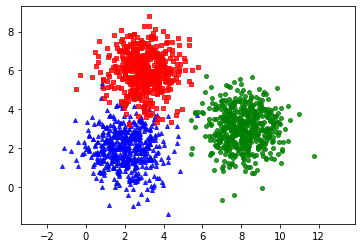

In [4]:
display_data(X, original_labels)

In [5]:
def init_centers(X, number_clusters):
    """Khởi tạo các điểm centers ban đầu của từng cụm
    """
    np.random.seed(17)
    return X[np.random.choice(X.shape[0], number_clusters, replace=False)]

def assign_labels(X, centers):
    """Gán nhãn cho từng điểm dữ liệu theo center gần nhất
    """
    distance = cdist(X, centers)

    return np.argmin(distance, axis=1)

def update_centers(X, labels, number_clusters):
    """Update các centers theo trung bình các điểm dữ liệu
    """
    new_centers = np.zeros((number_clusters, X.shape[1]))
    for k in range(number_clusters):
        new_centers[k,:] = np.mean(X[labels == k,:], axis=0)
    return new_centers

def compare_equivalent(old_centers, new_centers):
    """Kiểm tra các điểm center mới có giống với các điểm center cũ hay không
    """
    return (set([tuple(a) for a in old_centers]) == set([tuple(b) for b in new_centers]))

def k_means_clustering(X, number_clusters):
    """Thuật toán phân cụm K-means
    """
    centers = [init_centers(X, number_clusters)]
    labels = []
    it = 0
    while True:
        labels.append(assign_labels(X, centers[-1]))
        new_centers = update_centers(X, labels[-1], number_clusters)
        if compare_equivalent(centers[-1], new_centers):
            break
        centers.append(new_centers)
    return (it, centers[-1], labels)

In [6]:
(num_it, centers, labels) = k_means_clustering(X, number_clusters)
print(f'after {num_it} loops')
print(f'centers = {centers}')

after 0 loops
centers = [[2.96953039 5.95127727]
 [8.08403668 3.04412029]
 [2.06841576 1.9612448 ]]
